<h1 align=center><font size = 6>IBM Data science Capstone project </font> </h1>
<h2 align=center><font size = 5> Predicting Seattle car accident severity </font> </h2>
<h3 align=center><font size = 4> Renuka Devi Ulaganathan </font>  </h3>
<h4 align=center> <font size = 3> October 22, 2020</font></h4>

## Introduction:
With the prevailing traffic conditions around the globe, there is a need for an alert system that would predict the possibility of an accident based on given conditions. Using machine learning techniques, a model can be built and trained from the past collision data available. The model thus trained shall be used to predict the occurrence of a collision and its severity and alert the parties involved. <br>

## 1. Business understanding:

<P> The Seattle government, in an effort to reduce the number of car collisions, wants to reduce the car accidents in Seattle. To implement this, a model to be developed to predict the possibility of car accidents given factors like accident spot, driving speed,weather, road, light conditions etc. This model will help in warning the local Seattle government, traffic police and the drivers on the targeted roads that will help in reducing the frequency of accidents.

<p>The target audience of this project is Seattle government, traffic police department,city traffic surveillance team, car drivers and the local residents in the neighbourhood. </p><br>

##  2. Data understanding:
###      2.1 Source of the data: 
<P> The collision data used for this project is taken from Seattle Department of Transport (SDOT) provided in capstone project introduction. The link for the data is <a href = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"> here </a>. The metadata about the dataset can be found <a href = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf"> here </a>. <br>

In [1]:
import numpy as np
import pandas as pd

The data is be downloaded from the portal and saved into a python dataframe for further analytics.

In [2]:
#download the dataset 
!wget -O collision_data.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
print ('Dataset downloaded successfully')

--2020-10-22 17:04:07--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘collision_data.csv’

collision_data.csv  100%[===================>]  70.49M  17.9MB/s    in 4.2s    

2020-10-22 17:04:12 (16.9 MB/s) - ‘collision_data.csv’ saved [73917638/73917638]

Dataset downloaded successfully


In [3]:
df =pd.read_csv('collision_data.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Taking a look at the collision dataset, we have **194,673 rows** and **38 columns.**

In [5]:
no_cols=len(df.axes[1]) 
print ('The number of columns is : ',no_cols)
print ('The number of (rows,columns) is : ',df.shape)
print("The size of the dataset is :", df.size)
print ('The data types of different columns are below :\n')
df.dtypes

The number of columns is :  38
The number of (rows,columns) is :  (194673, 38)
The size of the dataset is : 7397574
The data types of different columns are below :



SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
#df.iloc[:20,:30]
print('Taking a back up of the dataframe for any reference down the line, as we will now proceed with data cleaning')
df_bkp=df.copy()

Taking a back up of the dataframe for any reference down the line, as we will now proceed with data cleaning


The target or dependent variable is <b> **'SEVERITYCODE'** </b> which determines the severity of the accident. Below are the possible values for this variable. However, the dataset provided in the capstone project has only **'1'** and **'2' severity codes**. so, our machine learning technique will apply on the provided data source. 

#### Severity codes:

0: Little to no Probability (Clear Conditions)

1: Very Low Probability — Chance or Property Damage

2: Low Probability — Chance of Injury

3: Mild Probability — Chance of Serious Injury

4: High Probability — Chance of Fatality

Out of the 38 columns present in the dataset, it is necessary to determine the predictor or independent variables that would influence the severity of the accident. Observing the data, the variables <b>'ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL', 'COLLISIONTYPE','JUNCTIONTYPE' and 'SPEEDING' </b> seem to more likely to impact the accident severity. Let us plot these variables against severity code and observe relationship between them. <br>
#### Identify the unique values for each of these variables:

In [176]:
print('The frequency of address type is:')
addr_count = df['ADDRTYPE'].value_counts()
addr_count

The frequency of address type is:


Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [163]:
print('The frequency of weather conditions is:')
weath_count=df['WEATHER'].value_counts()
weath_count

The frequency of weather conditions is:


Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Other                         5913
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [164]:
print('The frequency of road conditions is:\n')
road_count=df['ROADCOND'].value_counts()
road_count

The frequency of road conditions is:



Dry               124510
Wet                47474
Unknown            15078
Other               5144
Ice                 1209
Snow/Slush          1004
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [165]:
print('The frequency of light conditions is:\n')
light_count=df['LIGHTCOND'].value_counts()
light_count

The frequency of light conditions is:



Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Other                         5405
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [166]:
print('The distinct \'under influence\' values and its respective counts are:')
infl_count=df['UNDERINFL'].value_counts()
infl_count

The distinct 'under influence' values and its respective counts are:


N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [167]:
print('The distinct speeding values and its respective counts are:')
speed_count=df['SPEEDING'].value_counts()
speed_count

The distinct speeding values and its respective counts are:


N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [168]:
print('The frequency of collision types is:')
coll_count=df['COLLISIONTYPE'].value_counts()
coll_count

The frequency of collision types is:


Parked Car    47987
Angles        34674
Rear Ended    34090
Other         28607
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [187]:
print('The frequency of junction types is:')
junc_count=df['JUNCTIONTYPE'].value_counts()
junc_count

The frequency of junction types is:


Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
Other                                                 6329
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

### 2.2 Data Cleaning:

In [8]:
text_empty = df.isnull().sum()
print('The total number of null/NaN values for each variable is as follows: \n\n',text_empty);

The total number of null/NaN values for each variable is as follows: 

 SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HIT

In [9]:
print('Let us replace the null or NaN values of SPEEDING to N, null, NaN and 0 values of UNDERINFL to N and all other null values of predictor variables to \'other\'')
df['SPEEDING']=df['SPEEDING'].fillna('N')
df['ADDRTYPE']=df['ADDRTYPE'].fillna('Other')
df['WEATHER']=df['WEATHER'].fillna('Other')
df['ROADCOND']=df['ROADCOND'].fillna('Other')
df['LIGHTCOND']=df['LIGHTCOND'].fillna('Other')
df['COLLISIONTYPE']=df['COLLISIONTYPE'].fillna('Other')
df['JUNCTIONTYPE']=df['JUNCTIONTYPE'].fillna('Other')
df['UNDERINFL']=df['UNDERINFL'].fillna('N')

Let us replace the null or NaN values of SPEEDING to N, null, NaN and 0 values of UNDERINFL to N and all other null values of predictor variables to 'other'


Now, Let us check if there are still any null values for these independent variables.

In [10]:
text_empty = df.isnull().sum()
text_empty

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE               0
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE          0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE           0
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING               0
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Good! We have got rid off Nan and NULL values for the independent variables.<br>
### 2.3 Understanding of Target variable:


The severity codes by count is as follows:
 1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

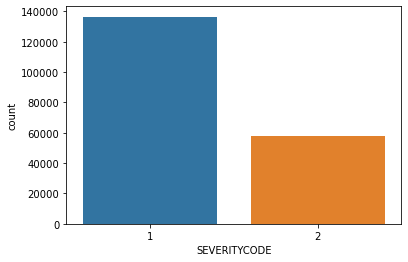

In [11]:
import seaborn as sns
target=df['SEVERITYCODE']
y=target.value_counts()
print('The severity codes by count is as follows:\n', y)
sns.countplot(target,data=df)

#### 2.3.1 Downsampling and Balancing the dataset: <br>
<p>As we see, the severity code '1'(property damage) is more than doubles the time of severity code '2'(Injury). Hence the dataset is highly unbalanced. It will be difficult to predict or apply machine learning algorithms on unbalanced dataset. Hence, I shall downsample the dataset to balance it.</p>

Let us take these variables to understand what kind of impact it has on SEVERITYCODE. <br>


In [12]:
from sklearn.utils import resample
df_sev1=df[df.SEVERITYCODE==1]
df_sev2=df[df.SEVERITYCODE==2]
df_sev1_sample = resample(df_sev1,
                         replace=False,
                         n_samples=58188,
                         random_state=123)
df_bal=pd.concat([df_sev1_sample,df_sev2])
print('The dataset is now balanced and can be used for machine learning. Severity code frequency is below.')
df_bal.SEVERITYCODE.value_counts()

The dataset is now balanced and can be used for machine learning. Severity code frequency is below.


2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

###  2.3.2 Feature selection: <br>
<p> As part of feature selection, let us drop the rest of the fields that are not part of independent variable list.

In [13]:
df_bal.drop(['X', 'Y', 'STATUS','COLDETKEY', 'REPORTNO', 'INCKEY','INTKEY', 'LOCATION', 'EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1', 'SEVERITYDESC', 'INCDATE','INCDTTM', \
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', \
       'HITPARKEDCAR', 'OBJECTID'], axis=1,inplace=True)

In [14]:
print('The variables part of dataframe are listed below: \n')
df_bal.head()

The variables part of dataframe are listed below: 



,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
25055,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Dark - Street Lights On,N
65280,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Clear,Dry,Daylight,N
86292,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Unknown,Unknown,Unknown,N
155111,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
64598,1,Block,Head On,3,0,0,2,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,N


In [15]:
df_bal.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
dtype: object

As a next step, want to understand if the variables **PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT and VEHCOUNT** has impact on the severity code before doing
<b>dimension reduction </b>. Let us draw the **correlation matrix** with these numerical data to analyze further. <br>
### 2.3.3 Correlation Matrix of numeric variables:

Text(32.99999999999999, 0.5, 'Vehicle, person and pedestrial counts')

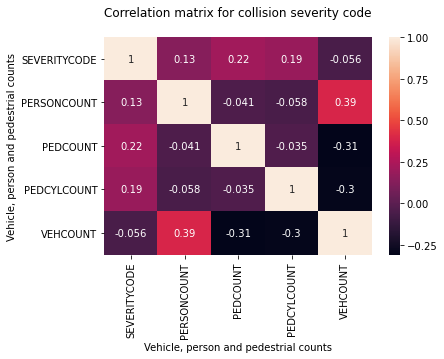

In [16]:
#X=df[['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','SPEEDING']]
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
correlation = df_bal.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.title('Correlation matrix for collision severity code\n')
plt.xlabel('Vehicle, person and pedestrial counts')
plt.ylabel('Vehicle, person and pedestrial counts')

From the correlation matrix above, we can see that the correlation coefficient is less than 0.5 for all the variables mapped and hence none of them have stronger relation between them. Comapring the variables against SEVERITYCODE, the variables  **PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT and VEHCOUNT** have **weaker relationship** with **severity code.** Hence these can be dropped from the dataframe.

In [17]:
print('Dropping PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT from the Data Frame\n')
df_bal.drop(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT'], axis=1,inplace=True)
df_bal.head()

Dropping PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT from the Data Frame



,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
25055,1,Intersection,Angles,At Intersection (intersection related),0,Raining,Wet,Dark - Street Lights On,N
65280,1,Intersection,Angles,At Intersection (intersection related),0,Clear,Dry,Daylight,N
86292,1,Intersection,Angles,At Intersection (intersection related),N,Unknown,Unknown,Unknown,N
155111,1,Block,Sideswipe,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
64598,1,Block,Head On,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,N


In [18]:
df_bal.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
dtype: object

### 3. Exploratory data analysis: <br>

The variable **UNDERINFL** currently has values **'0','N','Y' and '1'**. To keep it unform for machine learning, let us map 'N' to '0'and Y to '1'.

In [19]:
print('The values variable UNDERINFL is mapped to values 0 and 1')
df_bal["UNDERINFL"].replace('0', 0, inplace=True)
df_bal["UNDERINFL"].replace('N', 0, inplace=True)
df_bal["UNDERINFL"].replace('Y', 1, inplace=True)
df_bal["UNDERINFL"].replace('1', 1, inplace=True)

The values variable UNDERINFL is mapped to values 0 and 1


#### 3.1 Relationship between ADDRTYPE and SEVERITYCODE:

In [20]:
addr_sev=df_bal[['ADDRTYPE','SEVERITYCODE']] 
by_addr=pd.DataFrame(addr_sev.groupby(['ADDRTYPE','SEVERITYCODE'],as_index=False).agg(np.size))
by_addr.columns=['ADDRTYPE','SEVERITYCODE','ADDRCOUNT']
by_addr.reset_index(['ADDRTYPE','SEVERITYCODE'],inplace = True,drop=True) 
by_addr.sort_values(by=['ADDRCOUNT'],inplace=True,ascending=False)
by_addr

,ADDRTYPE,SEVERITYCODE,ADDRCOUNT
2,Block,1,82450
3,Block,2,60192
5,Intersection,2,55638
4,Intersection,1,31862
6,Other,1,1462
0,Alley,1,602
7,Other,2,382
1,Alley,2,164


#### 3.1.1 ADDRCOUNT vs SEVERITYCODE - Data Visualization

Text(0, 0.5, 'Number of accidents by Severity')

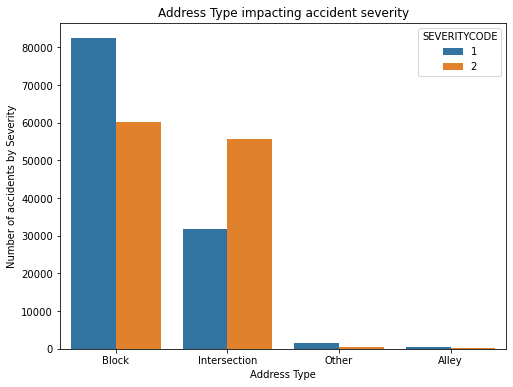

In [216]:
plt.figure(figsize=(8,6))
sns.barplot(y='ADDRCOUNT',x='ADDRTYPE',hue='SEVERITYCODE',data=by_addr)
plt.title('Address Type impacting accident severity')
plt.xlabel('Address Type')
plt.ylabel('Number of accidents by Severity')

From the above, we can see that **ADDRCOUNT** has strong relationship with SEVERITYCODE influencing the accident severity. Hence, it should be considered as part of the independent variables to predict SEVERITYCODE.

### 3.2 Relationship between WEATHER and SEVERITYCODE:

In [25]:
weath_sev=df_bal[['WEATHER','SEVERITYCODE']]
by_weath=pd.DataFrame(weath_sev.groupby(['WEATHER','SEVERITYCODE'],as_index=False).agg(np.size))
by_weath.columns=['WEATHER','SEVERITYCODE','WEATHCOUNT']
by_weath.reset_index(['WEATHER','SEVERITYCODE'],inplace = True,drop=True) 
by_weath.sort_values(by=['WEATHCOUNT'],inplace=True,ascending=False)
by_weath

,WEATHER,SEVERITYCODE,WEATHCOUNT
3,Clear,2,71680
2,Clear,1,64212
13,Raining,2,22352
12,Raining,1,18816
9,Overcast,2,17490
8,Overcast,1,16178
20,Unknown,1,12070
21,Unknown,2,1632
18,Snowing,1,606
6,Other,1,580


#### 3.2.1 WEATHER vs SEVERITYCODE - Data Visualization

Text(0, 0.5, 'Number of accidents by Severity')

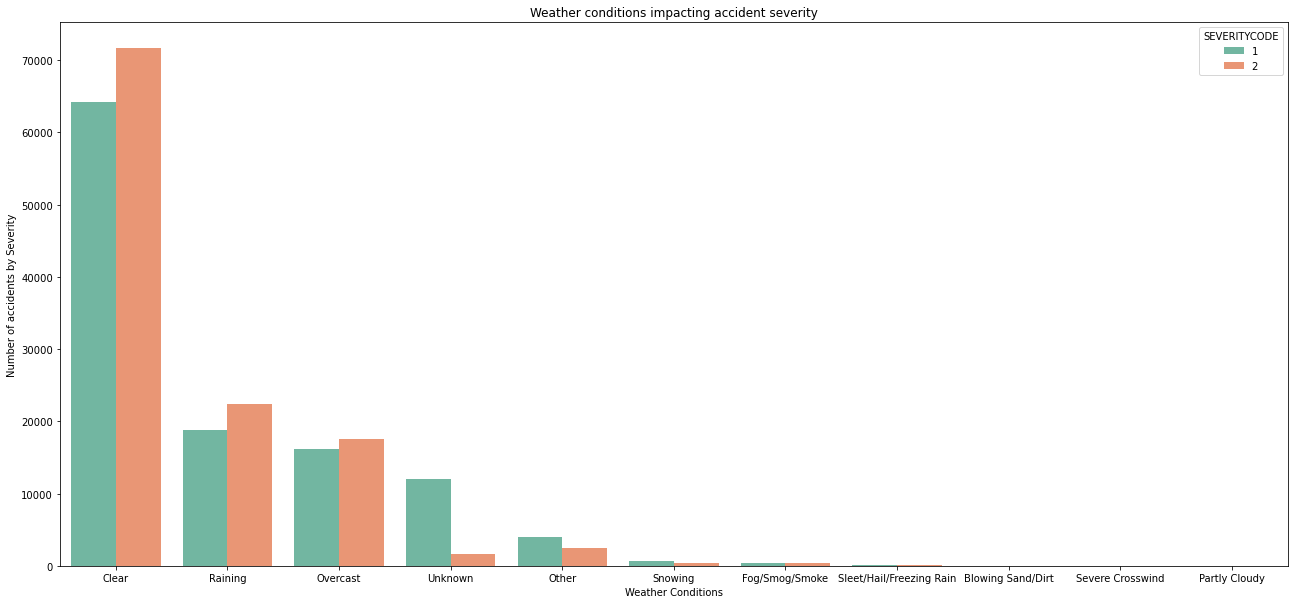

In [113]:
sns.color_palette('Set2')
plt.figure(figsize=(22,10))
sns.barplot(y='WEATHCOUNT',x='WEATHER',hue='SEVERITYCODE',data=by_weath,palette='Set2')
plt.title('Weather conditions impacting accident severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of accidents by Severity')

From the above, we can see that **WEATHER** has strong relationship with SEVERITYCODE influencing the accident severity. Hence, it should be considered as part of the independent variables to predict accident severity.

### 3.3 Relationship between LIGHTCOND and SEVERITYCODE:

In [26]:
light_sev=df_bal[['LIGHTCOND','SEVERITYCODE']]
by_light=pd.DataFrame(light_sev.groupby(['LIGHTCOND','SEVERITYCODE'],as_index=False).agg(np.size))
by_light.columns=['LIGHTCOND','SEVERITYCODE','LIGHTCOUNT']
by_light.reset_index(['LIGHTCOND','SEVERITYCODE'],inplace = True,drop=True) 
by_light.sort_values(by=['LIGHTCOUNT'],inplace=True,ascending=False)
by_light

,LIGHTCOND,SEVERITYCODE,LIGHTCOUNT
11,Daylight,2,77088
10,Daylight,1,65918
4,Dark - Street Lights On,1,29316
5,Dark - Street Lights On,2,28950
16,Unknown,1,10914
13,Dusk,2,3888
12,Dusk,1,3296
9,Dawn,2,1648
8,Dawn,1,1422
17,Unknown,2,1210


#### 3.3.1 LIGHTCOND vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Light conditions impacting accident severity')

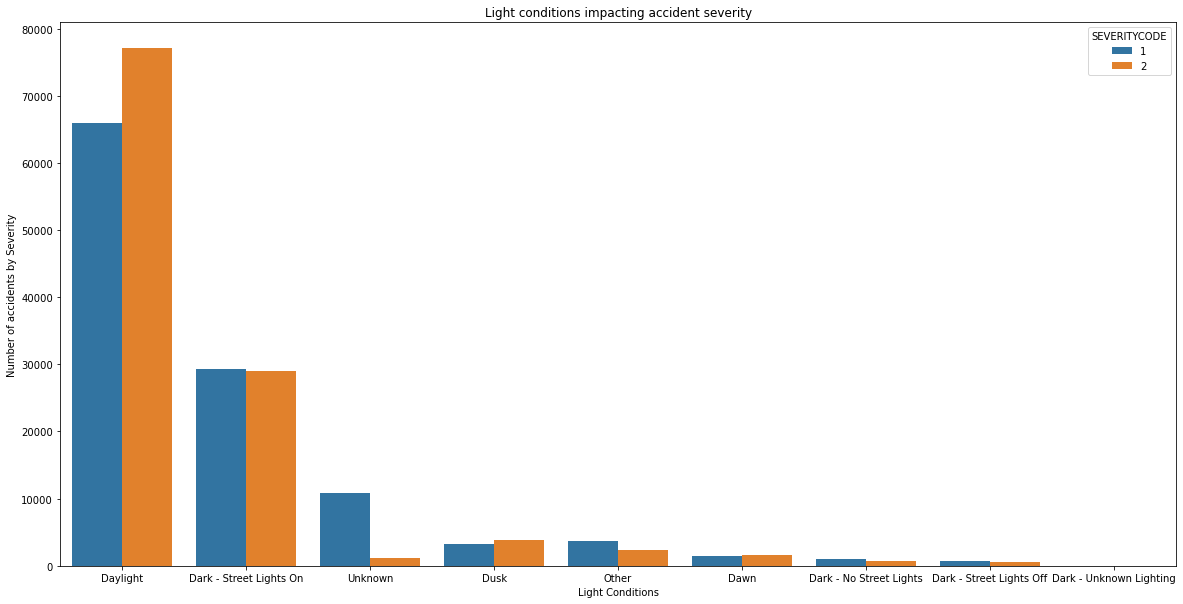

In [125]:
sns.color_palette()
plt.figure(figsize=(20,10))
sns.barplot(y='LIGHTCOUNT',x='LIGHTCOND',hue='SEVERITYCODE',data=by_light)
plt.xlabel('Light Conditions')
plt.ylabel('Number of accidents by Severity')
plt.title('Light conditions impacting accident severity')

From the above, we can see that **LIGHTCOND** has strong relationship with SEVERITYCODE influencing the accident severity. 
The accident has resulted in injury mainly during daylight and dark when street lights are on. 
Hence, it should be considered as part of the independent variables to predict accident severity.

### 3.4 Relationship between UNDERINFL and SEVERITYCODE:

In [21]:
infl_sev=df_bal[['UNDERINFL','SEVERITYCODE']]
by_infl=infl_sev.groupby(['UNDERINFL','SEVERITYCODE'])
by_infl.agg(np.size)
infl_sev=df_bal[['UNDERINFL','SEVERITYCODE']]
by_infl=pd.DataFrame(infl_sev.groupby(['UNDERINFL','SEVERITYCODE'],as_index=False).agg(np.size))
by_infl.columns=['UNDERINFL','SEVERITYCODE','INFLCOUNT']
by_infl.reset_index(['UNDERINFL','SEVERITYCODE'],inplace = True,drop=True) 
by_infl.sort_values(by=['INFLCOUNT'],inplace=True,ascending=False)
by_infl

,UNDERINFL,SEVERITYCODE,INFLCOUNT
0,0,1,111524
1,0,2,109252
3,1,2,7124
2,1,1,4852


#### 3.4.1 UNDRINFL vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Alcohol Influence impacting accident severity')

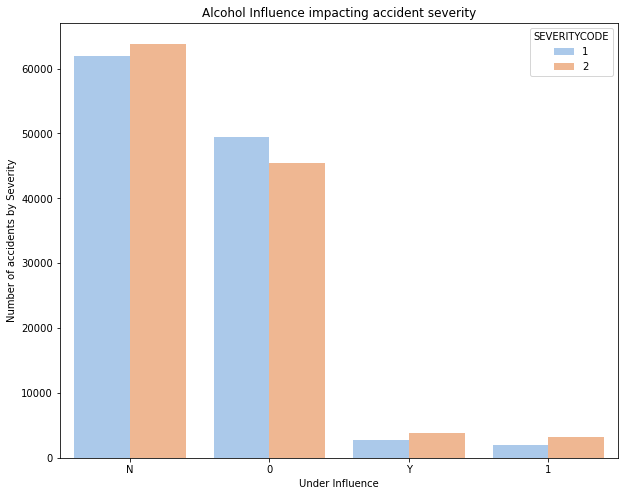

In [121]:
sns.color_palette('pastel')
plt.figure(figsize=(10,8))
sns.barplot(y='INFLCOUNT',x='UNDERINFL',hue='SEVERITYCODE',data=by_infl,palette ='pastel')
plt.xlabel('Under Influence')
plt.ylabel('Number of accidents by Severity')
plt.title('Alcohol Influence impacting accident severity')

From the above, we can see that **UNDERINFL** has weaker relationship with SEVERITYCODE in influencing the accident severity. 
We can see that the accident has resulted in property damage or injury when the driver is not under alcohol influence. 
Hence, it should **not be considered** as part of the independent variables to predict accident severity.

### 3.5 Relationship between ROADCOND and SEVERITYCODE:

In [28]:
road_sev=df_bal[['ROADCOND','SEVERITYCODE']]
by_road=pd.DataFrame(road_sev.groupby(['ROADCOND','SEVERITYCODE'],as_index=False).agg(np.size))
by_road.columns=['ROADCOND','SEVERITYCODE','ROADCOUNT']
by_road.reset_index(['ROADCOND','SEVERITYCODE'],inplace = True,drop=True) 
by_road.sort_values(by=['ROADCOUNT'],inplace=True,ascending=False)
by_road

,ROADCOND,SEVERITYCODE,ROADCOUNT
1,Dry,2,80128
0,Dry,1,71872
17,Wet,2,31510
16,Wet,1,27238
14,Unknown,1,12114
15,Unknown,2,1498
2,Ice,1,810
10,Snow/Slush,1,722
3,Ice,2,546
11,Snow/Slush,2,334


#### 3.5.1 ROADCOND vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Road conditions impacting accident severity')

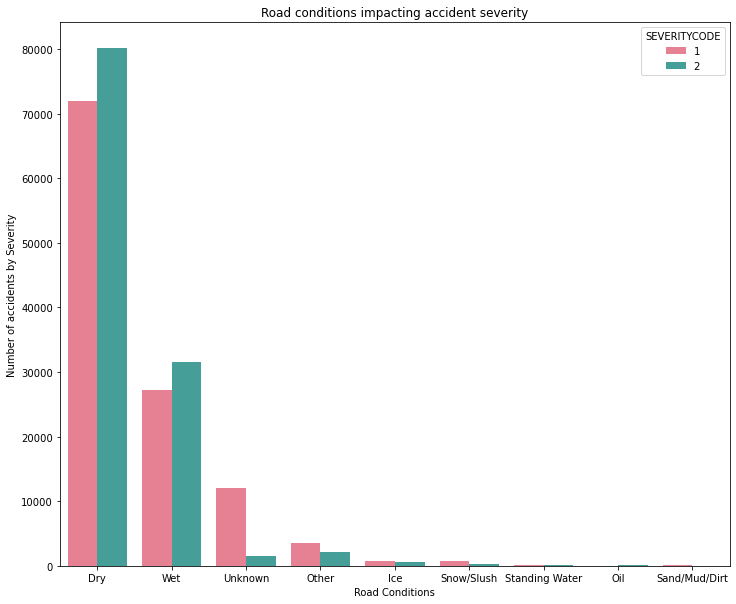

In [208]:
sns.color_palette('husl')
plt.figure(figsize=(12,10))
sns.barplot(y='ROADCOUNT',x='ROADCOND',hue='SEVERITYCODE',data=by_road,palette='husl')
plt.xlabel('Road Conditions')
plt.ylabel('Number of accidents by Severity')
plt.title('Road conditions impacting accident severity')

From the above, we can see that **ROADCOND** has strong relationship with SEVERITYCODE influencing the accident severity. 
The accident has resulted in injury mainly when the road was dry and wet.
Hence, it should be considered as part of the independent variables to predict accident severity.

### 3.6 Relationship between COLLISIONTYPE and SEVERITYCODE:

In [14]:
coll_sev=df_bal[['COLLISIONTYPE','SEVERITYCODE']]
by_coll=pd.DataFrame(coll_sev.groupby(['COLLISIONTYPE','SEVERITYCODE'],as_index=False).agg(np.size))
by_coll.columns=['COLLISIONTYPE','SEVERITYCODE','COLLNCOUNT']
by_coll.reset_index(['COLLISIONTYPE','SEVERITYCODE'],inplace = True,drop=True) 
by_coll.sort_values(by=['COLLNCOUNT'],inplace=True,ascending=False)
by_coll

,COLLISIONTYPE,SEVERITYCODE,COLLNCOUNT
10,Parked Car,1,38614
15,Rear Ended,2,29342
1,Angles,2,27248
8,Other,1,18450
0,Angles,1,17868
14,Rear Ended,1,16466
9,Other,2,14306
18,Sideswipe,1,13794
13,Pedestrian,2,11872
7,Left Turn,2,10822


#### 3.6.1 COLLISIONTYPE vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Collision type impacting accident severity')

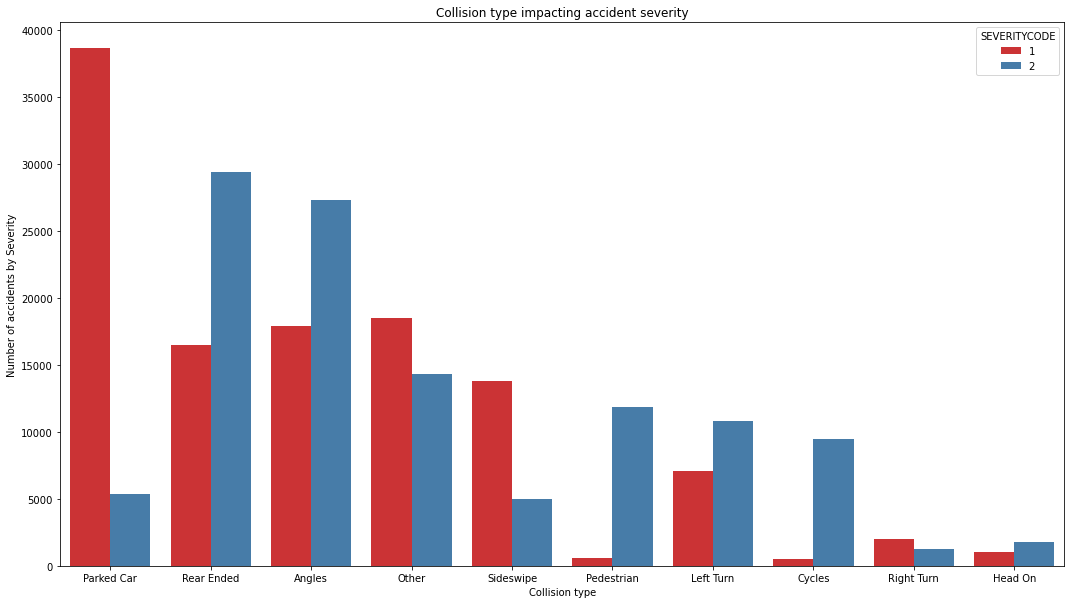

In [15]:
sns.color_palette('Set1')
plt.figure(figsize=(18,10))
sns.barplot(y='COLLNCOUNT',x='COLLISIONTYPE',hue='SEVERITYCODE',data=by_coll,palette='Set1')
plt.xlabel('Collision type')
plt.ylabel('Number of accidents by Severity')
plt.title('Collision type impacting accident severity')

From the barplot, we can see that **COLLISIONTYPE** has strong relationship with SEVERITYCODE influencing the accident severity. 
Hence, it should be considered as part of the independent variables to predict accident severity.

### 3.7 Relationship between JUNCTIONTYPE and SEVERITYCODE:

In [31]:
junc_sev=df_bal[['JUNCTIONTYPE','SEVERITYCODE']]
by_junc=pd.DataFrame(junc_sev.groupby(['JUNCTIONTYPE','SEVERITYCODE'],as_index=False).agg(np.size))
by_junc.columns=['JUNCTIONTYPE','SEVERITYCODE','JUNCNCOUNT']
by_junc.reset_index(['JUNCTIONTYPE','SEVERITYCODE'],inplace = True,drop=True) 
by_junc

,JUNCTIONTYPE,SEVERITYCODE,JUNCNCOUNT
0,At Intersection (but not related to intersection),1,1290
1,At Intersection (but not related to intersection),2,1246
2,At Intersection (intersection related),1,30446
3,At Intersection (intersection related),2,54348
4,Driveway Junction,1,6336
5,Driveway Junction,2,6468
6,Mid-Block (but intersection related),1,13258
7,Mid-Block (but intersection related),2,14594
8,Mid-Block (not related to intersection),1,59890
9,Mid-Block (not related to intersection),2,38808


#### 3.7.1 JUNCTIONTYPE vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Junction types impacting accident severity')

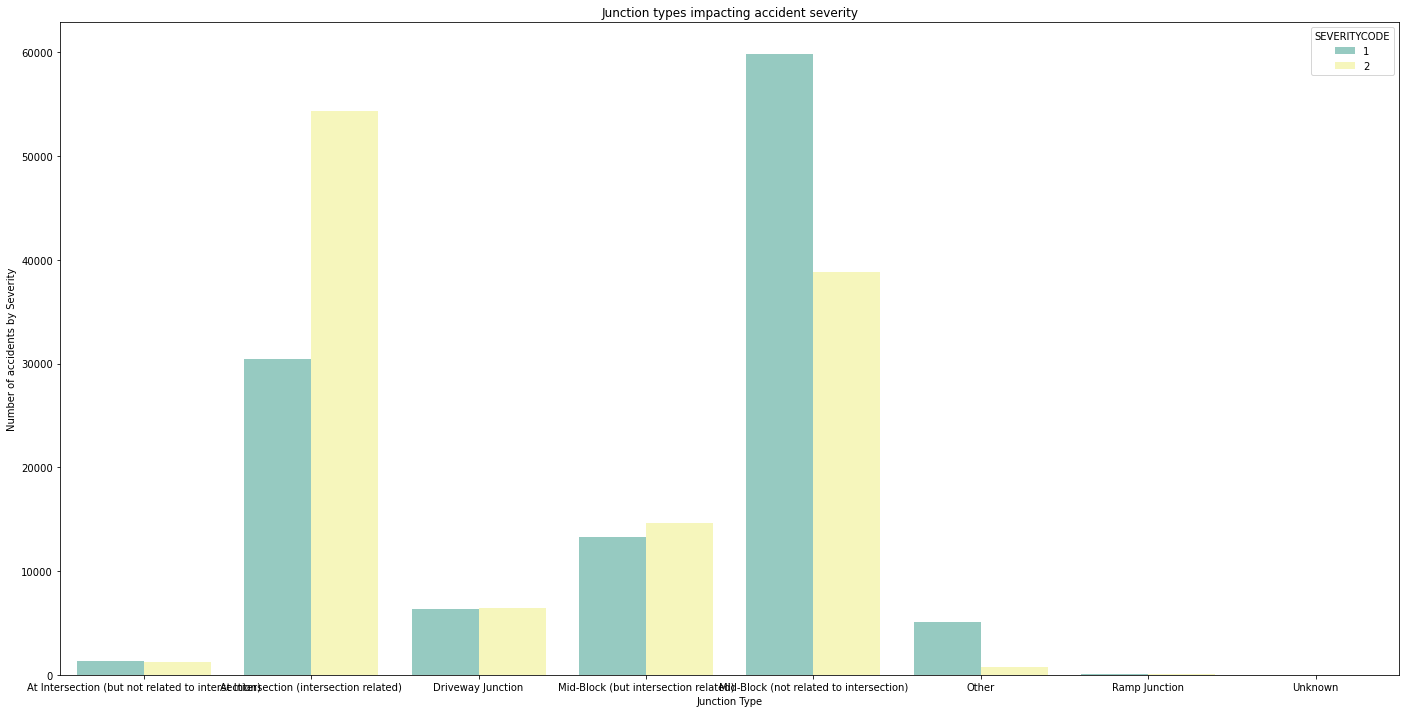

In [144]:
sns.color_palette('Set3')
plt.figure(figsize=(24,12))
sns.barplot(y='JUNCNCOUNT',x='JUNCTIONTYPE',hue='SEVERITYCODE',data=by_junc,palette='Set3')
plt.xlabel('Junction Type')
plt.ylabel('Number of accidents by Severity')
plt.title('Junction types impacting accident severity')

From the barplot, we can see that **JUNCTIONTYPE** has strong relationship with SEVERITYCODE influencing the accident severity. 
The accidents are more at midblock and intersection points.
Hence, it should be considered as part of the independent variables to predict accident severity.

### 3.8 Relationship between SPEEDING and SEVERITYCODE:

In [145]:
speed_sev=df_bal[['SPEEDING','SEVERITYCODE']]
by_speed=pd.DataFrame(speed_sev.groupby(['SPEEDING','SEVERITYCODE'],as_index=False).agg(np.size))
by_speed.columns=['SPEEDING','SEVERITYCODE','SPEEDCOUNT']
by_speed.reset_index(['SPEEDING','SEVERITYCODE'],inplace = True,drop=True) 
by_speed.sort_values(by=['SPEEDCOUNT'],inplace=True,ascending=False)
by_speed


,SPEEDING,SEVERITYCODE,SPEEDCOUNT
0,N,1,111478
1,N,2,109314
3,Y,2,7062
2,Y,1,4898


#### 3.8.1 SPEEEDING vs SEVERITYCODE - Data Visualization

Text(0.5, 1.0, 'Vehicle speeding impacting accident severity')

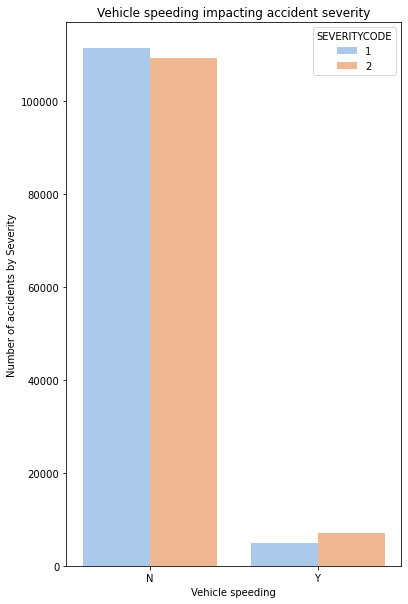

In [157]:
sns.color_palette('pastel')
plt.figure(figsize=(6,10))
sns.barplot(y='SPEEDCOUNT',x='SPEEDING',hue='SEVERITYCODE',data=by_speed,palette='pastel')
plt.xlabel('Vehicle speeding')
plt.ylabel('Number of accidents by Severity')
plt.title('Vehicle speeding impacting accident severity')

From the barplot above, we can see that **SPEEEDING** has less impact on SEVERITYCODE influencing the accident severity. 
The accident has been reported more from vehicles which were not speeding.
Hence, it should **not be considered** as part of the independent variables to predict accident severity.

At the end of Data visualization, we undersgtand that **UNDERINFL and SPEEDING** cannot be relied upon to predict SEVERITYCODE. Let us remove them from dataframe.

In [22]:
df_bal.drop(['UNDERINFL', 'SPEEDING'], axis=1,inplace=True)
print('UNDERINFL and SPEEDING has been dropped from the Data Frame.\n')

UNDERINFL and SPEEDING has been dropped from the Data Frame.



In [14]:
df_bal.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
25055,1,Intersection,Angles,At Intersection (intersection related),Raining,Wet,Dark - Street Lights On
65280,1,Intersection,Angles,At Intersection (intersection related),Clear,Dry,Daylight
86292,1,Intersection,Angles,At Intersection (intersection related),Unknown,Unknown,Unknown
155111,1,Block,Sideswipe,Mid-Block (not related to intersection),Clear,Dry,Daylight
64598,1,Block,Head On,Mid-Block (not related to intersection),Clear,Dry,Daylight


In [23]:
df_bal.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
JUNCTIONTYPE     object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

### 4. Data Preprocessing:

<p>The above indpendent variables are now categorical variables. To apply machine learning algorithms, we have to convert the categorical values to a dummy numeric values.</p>

Let us do **Label encoding** to assign a unique numeric value to each catagory of variables.

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_bal['WEATHER']=label_encoder.fit_transform(df_bal['WEATHER'])
df_bal['ADDRTYPE']=label_encoder.fit_transform(df_bal['ADDRTYPE'])
df_bal['LIGHTCOND']=label_encoder.fit_transform(df_bal['LIGHTCOND'])
df_bal['ROADCOND']=label_encoder.fit_transform(df_bal['ROADCOND'])
df_bal['COLLISIONTYPE']=label_encoder.fit_transform(df_bal['COLLISIONTYPE'])
df_bal['JUNCTIONTYPE']=label_encoder.fit_transform(df_bal['JUNCTIONTYPE'])

In [25]:
df_bal.index = np.arange(1,len(df_bal)+1)
df_bal.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
1,1,2,0,1,6,8,2
2,1,2,0,1,1,0,5
3,1,2,0,1,10,7,8
4,1,1,9,4,1,0,5
5,1,1,2,4,1,0,5


Now, we have the target variable balanced and the input feature standardized. Now ,the data is ready to be fed to build data models

### 5. Methodology:
#### 5.1 Normalize the dataset:

In [26]:
X=df_bal[['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
y=df_bal['SEVERITYCODE']
X= preprocessing.StandardScaler().fit(X).transform(X)
X

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1.19928446, -1.54308736, -1.16620991,  1.14540715,  1.51817092,
        -1.44024903],
       [ 1.19928446, -1.54308736, -1.16620991, -0.72831759, -0.70452717,
         0.35067745],
       [ 1.19928446, -1.54308736, -1.16620991,  2.64438695,  1.24033366,
         2.14160392],
       ...,
       [-0.76190332, -0.83207189,  0.94047317, -0.72831759, -0.70452717,
         0.35067745],
       [ 1.19928446, -0.47656415, -1.16620991, -0.72831759, -0.70452717,
         0.35067745],
       [ 1.19928446, -1.18757963, -1.16620991, -0.72831759, -0.70452717,
         0.94765294]])

#### 5.2 Splitting the dataset into test and train data:

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 6) (93100,)
Test set: (23276, 6) (23276,)


The four models which will be built, tested and compared are:

     1. K-Nearest Neighbours (kNN)
     2. Support Vector Machine (SVM)
     3. Decision tree
     4. Logistic Regression


### 1. K-Nearest Neighbours:

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#### 1.1.Determining the best K value:

In [19]:
error_data=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_knn=knn.predict(X_test)
    error_data.append(np.mean(pred_knn!=y_test))
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform')

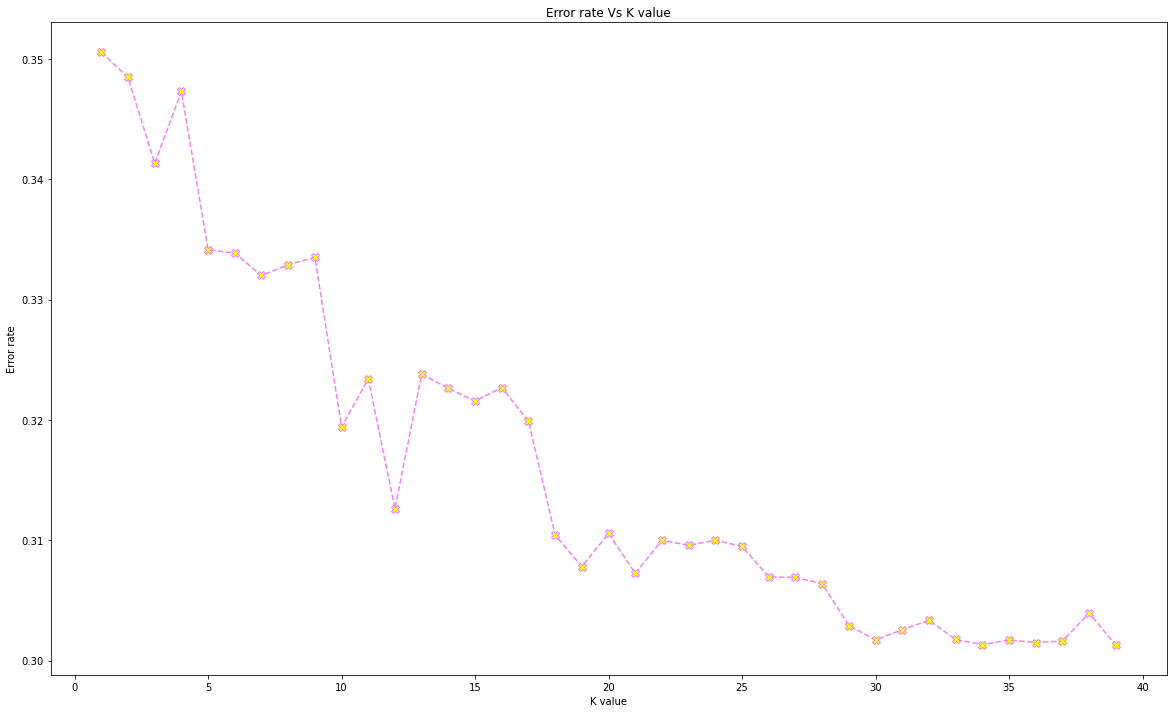

In [30]:

plt.figure(figsize=(20,12))
plt.plot(range(1,40),error_data,color='violet',linestyle = 'dashed',marker = 'X',markerfacecolor='yellow',markersize=8)
plt.title('Error rate Vs K value')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.show()

From the above plot, we can see that when the K value is 30, the error is low. So, let us choose the **K value as 30** to build the model.

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
print('Knn model with 30 is :',knn)
knn_pred=knn.predict(X_test)
print('Confusion Matrix:\n')
print(metrics.confusion_matrix(knn_pred,y_test))
print('\nClassification report:\n')
print(classification_report(knn_pred,y_test))

Knn model with 30 is : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')
Confusion Matrix:

[[7405 2816]
 [4207 8848]]

Classification report:

              precision    recall  f1-score   support

           1       0.64      0.72      0.68     10221
           2       0.76      0.68      0.72     13055

   micro avg       0.70      0.70      0.70     23276
   macro avg       0.70      0.70      0.70     23276
weighted avg       0.71      0.70      0.70     23276



In [22]:
print('Model Accuracy\n')
print(metrics.accuracy_score(knn_pred,y_test))

Model Accuracy

0.6982728991235607


### 2. Decision tree:

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=12)
dtc_fit = dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
print('Decision tree classifier prediction is :\n',dtc_pred)

Decision tree classifier prediction is :
 [2 1 1 ... 2 2 2]


In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix is below :\n', confusion_matrix(dtc_pred,y_test))
print('\nClassification report is below:\n', classification_report(dtc_pred,y_test))
print('\nAccuracy of Decision Tree Classifier is :\n', metrics.accuracy_score(dtc_pred,y_test))


Confusion Matrix is below :
 [[7329 2599]
 [4283 9065]]

Classification report is below:
               precision    recall  f1-score   support

           1       0.63      0.74      0.68      9928
           2       0.78      0.68      0.72     13348

   micro avg       0.70      0.70      0.70     23276
   macro avg       0.70      0.71      0.70     23276
weighted avg       0.71      0.70      0.71     23276


Accuracy of Decision Tree Classifier is :
 0.7043306410036089


### 3. Support Vector Machine:

In [25]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf',gamma='scale')
svm_fit=svm_model.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)
print('Support Vector Machine Prediction is :\n',svm_pred)

Support Vector Machine Prediction is :
 [2 1 1 ... 2 2 2]


In [35]:
print('Confusion Matrix is below :\n',confusion_matrix(svm_pred,y_test))
print('\nClassification report is below:\n',classification_report(svm_pred,y_test))
print('\nAccuracy of Support Vector Machine is :\n',metrics.accuracy_score(svm_pred,y_test))

Confusion Matrix is below :
 [[7034 2664]
 [4578 9000]]

Classification report is below:
               precision    recall  f1-score   support

           1       0.61      0.73      0.66      9698
           2       0.77      0.66      0.71     13578

   micro avg       0.69      0.69      0.69     23276
   macro avg       0.69      0.69      0.69     23276
weighted avg       0.70      0.69      0.69     23276


Accuracy of Support Vector Machine is :
 0.68886406599072


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01,solver='liblinear',fit_intercept=True)
lr_fit=lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print('Logistic Regression Fit is :\n',lr_fit)
print('\nLogistic Regression Prediction is :\n',lr_pred)

Logistic Regression Fit is :
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Logistic Regression Prediction is :
 [1 1 1 ... 1 2 2]


In [37]:
print('Confusion Matrix is below :\n',confusion_matrix(lr_pred,y_test))
print('\nClassification report is below:\n',classification_report(lr_pred,y_test))
print('\nAccuracy of Logistic Regression is :\n',metrics.accuracy_score(lr_pred,y_test))

Confusion Matrix is below :
 [[7534 5123]
 [4078 6541]]

Classification report is below:
               precision    recall  f1-score   support

           1       0.65      0.60      0.62     12657
           2       0.56      0.62      0.59     10619

   micro avg       0.60      0.60      0.60     23276
   macro avg       0.60      0.61      0.60     23276
weighted avg       0.61      0.60      0.61     23276


Accuracy of Logistic Regression is :
 0.6047001202955834


### 6. Results and Evaluation:
### 6.1 Jaccard index:

In [38]:
#Jaccard score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
knn_yhat=knn.predict(X_test)
jc1=(jaccard_similarity_score(y_test,knn_yhat))
dtc_yhat=dtc.predict(X_test)
jc2=(jaccard_similarity_score(y_test,dtc_yhat))
svm_yhat=svm_model.predict(X_test)
jc3=(jaccard_similarity_score(y_test,svm_yhat))
lr_yhat=lr.predict(X_test)
jc4=(jaccard_similarity_score(y_test,lr_yhat))

jc_score=[jc1,jc2,jc3,jc4]
print('The Jaccard score for knn is :%.3f'% jc_score[0])
print('The Jaccard score for Decision tree is :%.3f'% jc_score[1])
print('The Jaccard score for SVM is :%.3f'% jc_score[2])
print('The Jaccard score for Logistic regression is :%.3f'% jc_score[3])


The Jaccard score for knn is :0.698
The Jaccard score for Decision tree is :0.704
The Jaccard score for SVM is :0.689
The Jaccard score for Logistic regression is :0.605


### 6.2  F1 score:

In [44]:
#F1 score
knn_f1 = (f1_score(y_test,knn_yhat,average='weighted'))
dtc_f1=(f1_score(y_test,dtc_yhat,average='weighted'))
svm_f1=(f1_score(y_test,svm_yhat,average='weighted'))
lr_f1=(f1_score(y_test,lr_yhat,average='weighted'))

f1_scores=[knn_f1,dtc_f1,svm_f1,lr_f1]
print('The F1 score for Knn is :%.3f'% f1_scores[0])
print('The F1 score for Decision Tree is :%.3f'% f1_scores[1])
print('The F1 score for SVM is :%.3f'% f1_scores[2])
print('The F1 score for Logistic Regression is :%.3f'% f1_scores[3])

The F1 score for Knn is :0.697
The F1 score for Decision Tree is :0.703
The F1 score for SVM is :0.687
The F1 score for Logistic Regression is :0.604


In [42]:
from sklearn.metrics import log_loss
log_yhat = lr.predict_proba(X_test)

log_lossl = ['NA', 'NA', 'NA',(log_loss(y_test, log_yhat))]
log_lossl

['NA', 'NA', 'NA', 0.6569156752383143]

### 6.3. Model scores report:

In [45]:
my_jc_scores = [ '%.3f' % elem for elem in jc_score ]
my_f1_scores = [ '%.3f' % elem for elem in f1_scores ]

In [46]:
rep = pd.DataFrame( my_jc_scores,index=['KNN','Decision Tree','SVM','Logistic Regression'])
rep.columns = ['Jaccard']
rep.insert(loc=1, column='F1-score', value=my_f1_scores)
rep.insert(loc=2, column='LogLoss', value=log_lossl)
rep.columns.name = 'Algorithm'
rep

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.698,0.697,NA
Decision Tree,0.704,0.703,NA
SVM,0.689,0.687,NA
Logistic Regression,0.605,0.604,0.656916


From the above scores, We can infer that **Decision tree classifier model** is the best model to predict the severity of accidents due to car collisions at Seattle.

### 7. Discussion:

As part of dimention reduction, the information after analysis is reduced drastically from 38 columns to 6 independent variables and 1 predictor variable and the number of records used had to be reduced by down sampling technique in order to arrive at better accurate prediction results.

Once I analyzed and cleaned the data, the data was then fed through four Machine learning models; K-Nearest Neighbor, Decision Tree, Support Vector Machine and Logistic Regression. Although the first three are ideal for this project, logistic regression made most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing K value as 30 (max depth) and hyparameter C values helped to improve our accuracy to be the best possible.

### 8. Conclusion:

The information provided by Seattle Police Department is a first step to prove that a model can be generated to predict future accidents on the road and identify the type of information (independent variables) that can be used.

A condition specifying the reason behind car accidents during ideal driving conditions will increase the effectiveness of the model exponentially.